In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import Transformation
import DataCleaning
import ErrorVis
import numpy as np
import statsmodels.tools as stools

In [2]:
allData = DataCleaning.getEthereumData()

/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:197: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("eth_twitter_full.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:216: DtypeWarning: Columns (83,86,87,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  posts1 = pd.read_csv("ethereum-reddit.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modTrends["DayTime"] = pd.to_datetime(modTrends["Day"])


In [3]:
allData

,tweet_count,Close,Volume,one,transaction_count,Day,Ethereum,standardized_txs,standardized_tweets,standardized_posts,standardized_trends,standardized_social,standardized_txSq,standardized_tweetsSq,standardized_postsSq,standardized_trendSq,standardized_price
2020-08-02,48,370.671722,18909744275,22,1125886,2020-08-02,15.60,-0.825708,-1.155626,-0.993196,-0.576113,-0.908312,0.681794,1.335473,0.986437,0.331906,-1.367807
2020-08-03,78,386.295166,12834648062,22,1176793,2020-08-03,12.48,-0.379476,-0.974955,-0.993196,-0.787746,-0.918632,0.144002,0.950538,0.986437,0.620544,-1.356019
2020-08-04,86,389.875488,14086704221,19,1164208,2020-08-04,10.92,-0.489792,-0.926776,-1.023292,-0.893563,-0.947877,0.239896,0.858914,1.047126,0.798454,-1.353318
2020-08-05,68,401.590576,12875466638,14,1182699,2020-08-05,10.92,-0.327706,-1.035179,-1.073452,-0.893563,-1.000731,0.107391,1.071596,1.152300,0.798454,-1.344480
2020-08-06,85,394.961945,11304626458,12,1215885,2020-08-06,10.40,-0.036810,-0.932799,-1.093517,-0.928835,-0.985050,0.001355,0.870113,1.195779,0.862734,-1.349481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,447,2598.067139,29312342666,55,1181182,2022-02-24,32.90,-0.341004,1.247300,-0.662136,0.597366,0.394177,0.116283,1.555758,0.438424,0.356847,0.312663
2022-02-25,426,2764.535645,17208902048,73,1137898,2022-02-25,20.21,-0.720416,1.120831,-0.481558,-0.263411,0.125287,0.518999,1.256261,0.231898,0.069385,0.438255
2022-02-26,394,2781.111816,11724648351,85,1167802,2022-02-26,19.27,-0.458288,0.928115,-0.361173,-0.327172,0.079923,0.210028,0.861397,0.130446,0.107042,0.450761
2022-02-27,360,2621.801758,16150857254,79,1125065,2022-02-27,18.33,-0.832905,0.723354,-0.421366,-0.390934,-0.029648,0.693731,0.523241,0.177549,0.152829,0.330569


(0.0, 5036.635957)

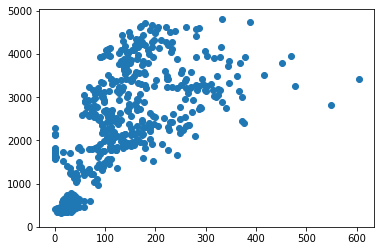

In [4]:
plt.scatter(allData["one"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 5036.635957)

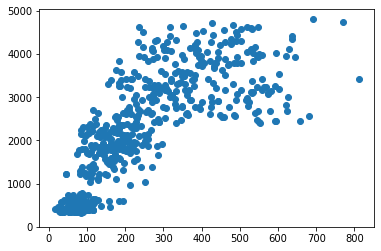

In [5]:
plt.scatter(allData["tweet_count"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 5036.635957)

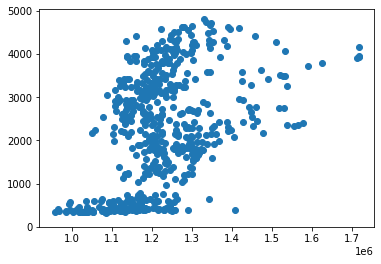

In [6]:
plt.scatter(allData["transaction_count"], allData["Close"])
plt.ylim(ymin=0)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import statsmodels.api as sm

In [8]:
X = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends"]])
Y = allData["standardized_price"]
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     385.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.14e-160
Time:                        15:22:23   Log-Likelihood:                -440.41
No. Observations:                 576   AIC:                             890.8
Df Residuals:                     571   BIC:                             912.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.98e-16    

Text(0, 0.5, 'closing price')

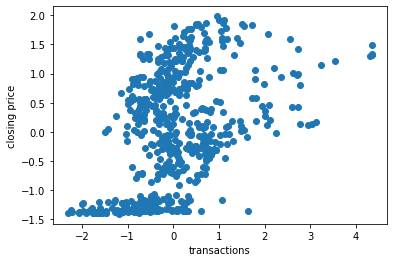

In [9]:
plt.scatter(allData["standardized_txs"], allData["standardized_price"])
plt.xlabel("transactions")
plt.ylabel("closing price")

Text(0, 0.5, 'closing price')

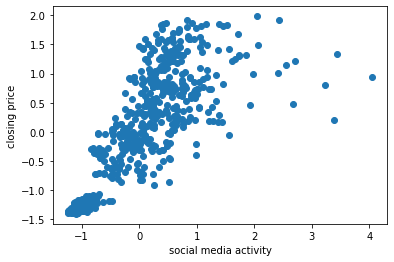

In [10]:
plt.scatter(allData["standardized_social"], allData["standardized_price"])
plt.xlabel("social media activity")
plt.ylabel("closing price")

In [11]:
allData["txnsSq"] = allData["standardized_txs"]*allData["standardized_txs"]
allData["smSq"] = allData["standardized_social"]*allData["standardized_social"]
allData["trendSq"] = allData["standardized_trends"]*allData["standardized_trends"]
allData["postsSq"] = allData["standardized_posts"]*allData["standardized_posts"]
allData["twtSq"] = allData["standardized_tweets"]*allData["standardized_tweets"]
XQuadratic = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_trends","txnsSq", "twtSq", "postsSq", "trendSq"]])

modelQuadratic = sm.OLS(Y, XQuadratic).fit()
print(modelQuadratic.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     226.8
Date:                Tue, 17 May 2022   Prob (F-statistic):          6.11e-160
Time:                        15:22:23   Log-Likelihood:                -433.20
No. Observations:                 576   AIC:                             882.4
Df Residuals:                     568   BIC:                             917.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1282    

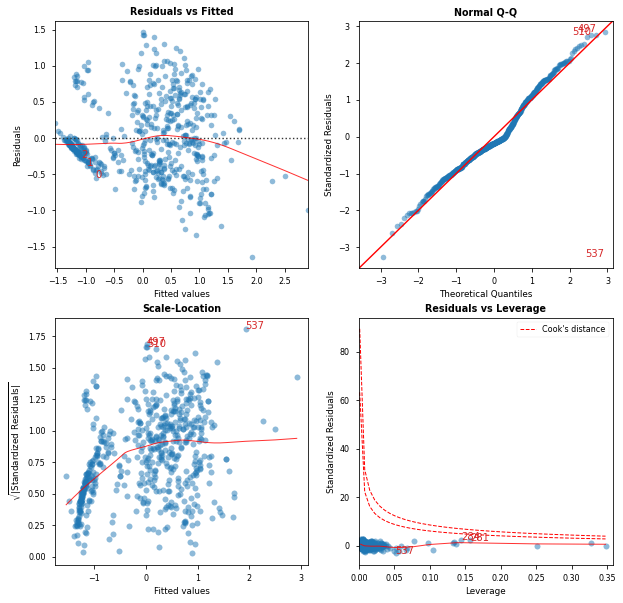

              Features  VIF Factor
5                twtSq        1.21
0                const        1.91
4               txnsSq        2.10
6              postsSq        2.57
1     standardized_txs        2.73
7              trendSq        3.11
2   standardized_posts        3.22
3  standardized_trends        4.31


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [12]:
quadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadratic)
quadDiagnostics()

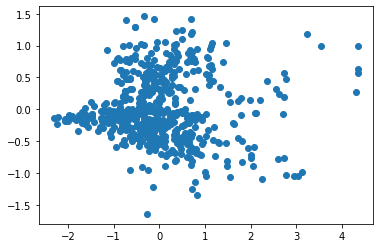

In [13]:
plt.scatter(allData["standardized_txs"], modelQuadratic.resid)

In [14]:
allData["smoothedClosingPrice"] = allData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allData["smoothedTrends"] = allData["Ethereum"].ewm(span=2).mean()
allData["smoothedPosts"] = allData["one"].ewm(span=2).mean()
allData["smoothedTxs"] = allData["transaction_count"].ewm(span=2).mean()
allData["smoothedTweets"] = allData["tweet_count"].ewm(span=2).mean()
allData[["standardized_smoothTx", "standardized_smoothTwt", "standardized_smoothPost", "standardized_smoothTrends"]] = prep.StandardScaler().fit_transform(allData[['smoothedTxs', 'smoothedTweets', 'smoothedPosts', "smoothedTrends"]])
allData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allData[["smoothedClosingPrice"]])
X = sm.add_constant(allData[["standardized_smoothTx", "standardized_smoothPost", "standardized_smoothTwt", "standardized_smoothTrends"]])
Y = allData["standardized_smoothPrice"]

modelSmoothed = sm.OLS(Y, X).fit()
print(modelSmoothed.summary())

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.787
Model:                                  OLS   Adj. R-squared:                  0.785
Method:                       Least Squares   F-statistic:                     525.9
Date:                      Tue, 17 May 2022   Prob (F-statistic):          7.82e-190
Time:                              15:22:25   Log-Likelihood:                -372.59
No. Observations:                       576   AIC:                             755.2
Df Residuals:                           571   BIC:                             777.0
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

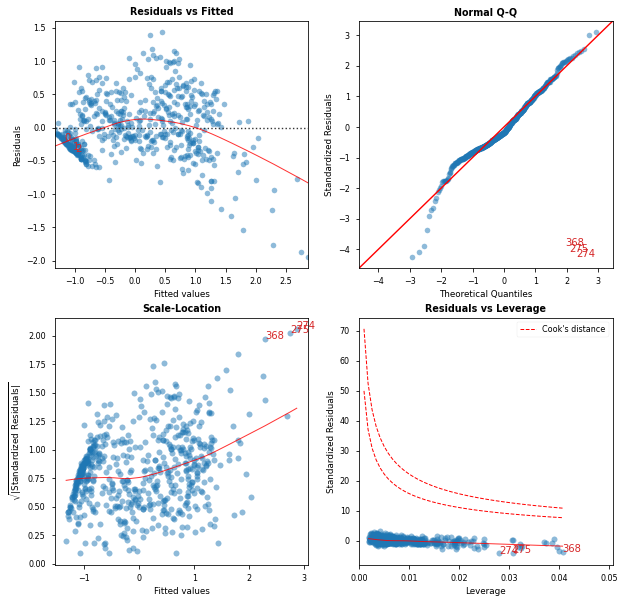

                    Features  VIF Factor
0                      const        1.00
3     standardized_smoothTwt        1.57
2    standardized_smoothPost        2.38
1      standardized_smoothTx        2.59
4  standardized_smoothTrends        3.35


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [15]:
smoothedDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelSmoothed)
smoothedDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.834
Model:                                  OLS   Adj. R-squared:                  0.831
Method:                       Least Squares   F-statistic:                     499.2
Date:                      Tue, 17 May 2022   Prob (F-statistic):          5.31e-251
Time:                              15:22:26   Log-Likelihood:                -300.75
No. Observations:                       576   AIC:                             619.5
Df Residuals:                           567   BIC:                             658.7
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

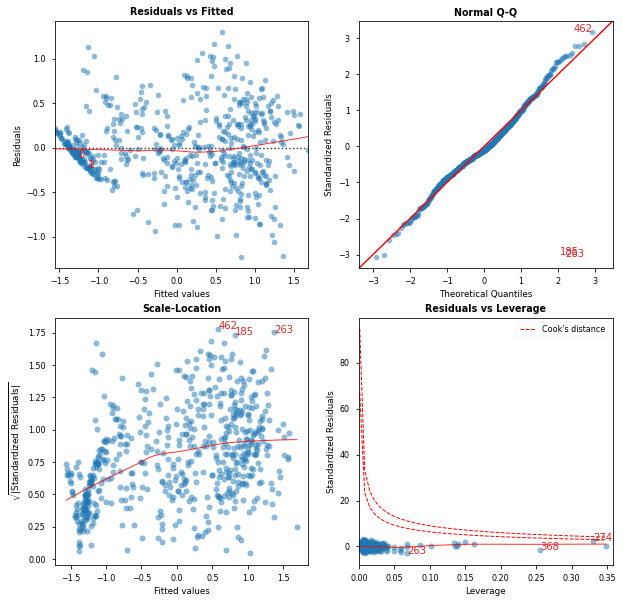

                Features  VIF Factor
0                  const        2.12
5      standardized_txSq        2.12
1       standardized_txs        2.75
7   standardized_postsSq        3.07
8  standardized_tweetsSq        3.19
6   standardized_trendSq        3.25
2     standardized_posts        4.51
3    standardized_tweets        4.52
4    standardized_trends        4.64


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [16]:
XQuadSmooth = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq", "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"]])
YSmooth = allData["standardized_smoothPrice"]
modelQuadSmoothed = sm.OLS(YSmooth, XQuadSmooth).fit(cov_type='HC3')
print(modelQuadSmoothed.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothed)
smoothedQuadDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.836
Model:                                  OLS   Adj. R-squared:                  0.833
Method:                       Least Squares   F-statistic:                     465.2
Date:                      Tue, 17 May 2022   Prob (F-statistic):          2.36e-236
Time:                              15:27:39   Log-Likelihood:                -292.35
No. Observations:                       548   AIC:                             602.7
Df Residuals:                           539   BIC:                             641.4
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

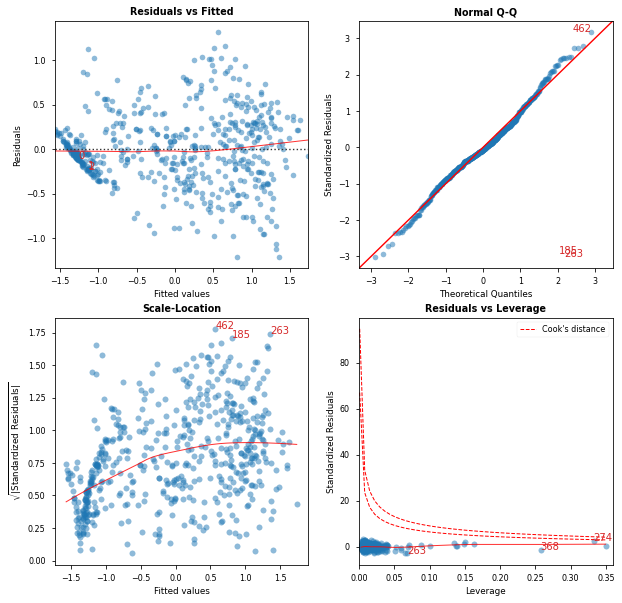

                Features  VIF Factor
5      standardized_txSq        2.16
0                  const        2.16
1       standardized_txs        2.81
7   standardized_postsSq        3.16
8  standardized_tweetsSq        3.19
6   standardized_trendSq        3.25
4    standardized_trends        4.70
3    standardized_tweets        5.00
2     standardized_posts        5.05
0.11948390206479907


In [26]:
YSmooth = allData["standardized_smoothPrice"]
modelQuadTrain = sm.OLS(YSmooth[0:548], XQuadSmooth[0:548]).fit(cov_type='HC3')
print(modelQuadTrain.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadTrain)
smoothedQuadDiagnostics()
XNewTest = XQuadSmooth[548:]
YPredTest = modelQuadTrain.predict(XNewTest)
YTestReal = YSmooth[548:]
print(stools.eval_measures.mse(YPredTest, YTestReal))

In [17]:
tranX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_trends", 
                                   "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_txs", "standardized_txSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTx = tranX
XQuadSmoothNoTx.index = idx

[[-0.03440452  0.6817943  -0.99319559]
 [-0.0158115   0.14400204 -0.99319559]
 [-0.02040798  0.23989578 -1.02329189]
 ...
 [-0.01909533  0.21002776 -0.36117311]
 [-0.03470437  0.69373065 -0.42136573]
 [-0.0408962   0.96335956 -0.55178307]]
[[-0.03440452  0.03051428 -0.99319559]
 [-0.0158115   0.01070507 -0.99319559]
 [-0.02040798  0.01487598 -1.02329189]
 ...
 [-0.01909533  0.0136362  -0.36117311]
 [-0.03470437  0.0308977  -0.42136573]
 [-0.0408962   0.0392688  -0.55178307]]
[[-0.03440452  0.03051428 -0.02759371]
 [-0.0158115   0.01070507 -0.04044567]
 [-0.02040798  0.01487598 -0.03879707]
 ...
 [-0.01909533  0.0136362  -0.00524965]
 [-0.03470437  0.0308977   0.00237376]
 [-0.0408962   0.0392688  -0.00022707]]
[[-0.03440452  0.03051428 -0.02759371]
 [-0.0158115   0.01070507 -0.04044567]
 [-0.02040798  0.01487598 -0.03879707]
 ...
 [-0.01909533  0.0136362  -0.00524965]
 [-0.03470437  0.0308977   0.00237376]
 [-0.0408962   0.0392688  -0.00022707]]
[[-0.03440452  0.6817943  -1.15562648]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.559
Model:                                  OLS   Adj. R-squared:                  0.555
Method:                       Least Squares   F-statistic:                     120.4
Date:                      Tue, 17 May 2022   Prob (F-statistic):           7.19e-98
Time:                              15:22:27   Log-Likelihood:                -581.30
No. Observations:                       576   AIC:                             1177.
Df Residuals:                           569   BIC:                             1207.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

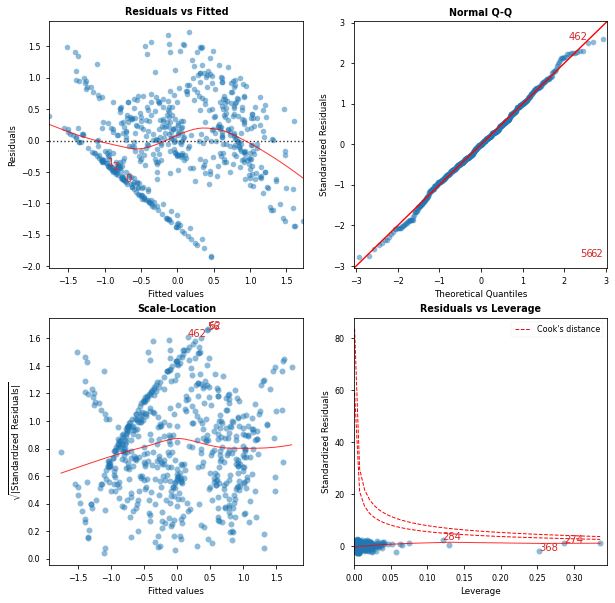

                Features  VIF Factor
0                  const        1.44
4   standardized_trendSq        1.89
3    standardized_trends        2.14
5   standardized_postsSq        2.44
1     standardized_posts        2.88
6  standardized_tweetsSq        3.15
2    standardized_tweets        3.74


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [18]:
modelQuadSmoothedNoTx = sm.OLS(YSmooth, XQuadSmoothNoTx).fit()
print(modelQuadSmoothedNoTx.summary())
smoothedQuadDiagnosticsNoTx = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTx)
smoothedQuadDiagnosticsNoTx()

In [19]:
trendX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_trends", "standardized_trendSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTrend = trendX
XQuadSmoothNoTrend.index = idx
Y = allData["standardized_price"]

[[-0.02400469  0.33190581 -0.99319559]
 [-0.03282275  0.62054359 -0.99319559]
 [-0.03723177  0.79845395 -1.02329189]
 ...
 [-0.01363218  0.10704172 -0.36117311]
 [-0.0162889   0.15282908 -0.42136573]
 [-0.01097546  0.06938536 -0.55178307]]
[[-0.02400469  0.02118073 -0.99319559]
 [-0.03282275  0.03218394 -0.99319559]
 [-0.03723177  0.03833487 -1.02329189]
 ...
 [-0.01363218  0.01045411 -0.36117311]
 [-0.0162889   0.01297329 -0.42136573]
 [-0.01097546  0.0080921  -0.55178307]]
[[-0.02400469  0.02118073 -0.03258041]
 [-0.03282275  0.03218394 -0.02265018]
 [-0.03723177  0.03833487 -0.01940091]
 ...
 [-0.01363218  0.01045411 -0.00665963]
 [-0.0162889   0.01297329 -0.00730681]
 [-0.01097546  0.0080921  -0.02083109]]
[[-0.02400469  0.02118073 -0.03258041]
 [-0.03282275  0.03218394 -0.02265018]
 [-0.03723177  0.03833487 -0.01940091]
 ...
 [-0.01363218  0.01045411 -0.00665963]
 [-0.0162889   0.01297329 -0.00730681]
 [-0.01097546  0.0080921  -0.02083109]]
[[-0.02400469  0.33190581 -1.15562648]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.341
Model:                                  OLS   Adj. R-squared:                  0.334
Method:                       Least Squares   F-statistic:                     49.04
Date:                      Tue, 17 May 2022   Prob (F-statistic):           1.51e-48
Time:                              15:22:29   Log-Likelihood:                -697.26
No. Observations:                       576   AIC:                             1409.
Df Residuals:                           569   BIC:                             1439.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

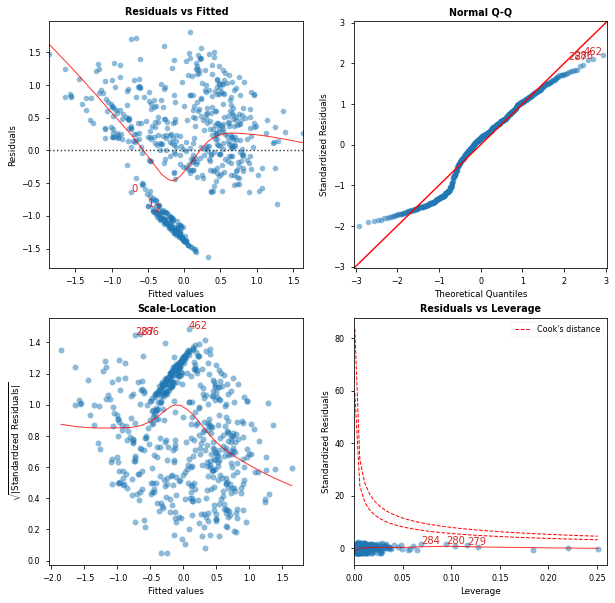

                Features  VIF Factor
3      standardized_txSq        1.25
4       standardized_txs        1.27
0                  const        1.46
5   standardized_postsSq        2.05
1     standardized_posts        2.23
2    standardized_tweets        2.91
6  standardized_tweetsSq        3.00


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [20]:
modelQuadSmoothedNoTrend = sm.OLS(YSmooth, XQuadSmoothNoTrend).fit()
print(modelQuadSmoothedNoTrend.summary())
smoothedQuadDiagnosticsNoTrend = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTrend)
smoothedQuadDiagnosticsNoTrend()

In [21]:
postX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_tweetsSq"], 
                                   ["standardized_posts", "standardized_postsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoPost = postX
XQuadSmoothNoPost.index = idx

[[-0.04138315  0.98643747 -0.57611267]
 [-0.04138315  0.98643747 -0.78774589]
 [-0.04263716  1.0471263  -0.89356251]
 ...
 [-0.01504888  0.13044602 -0.3271723 ]
 [-0.01755691  0.17754908 -0.3909336 ]
 [-0.02299096  0.30446455 -0.26341101]]
[[-0.04138315  0.04756234 -0.57611267]
 [-0.04138315  0.04756234 -0.78774589]
 [-0.04263716  0.04971503 -0.89356251]
 ...
 [-0.01504888  0.01202279 -0.3271723 ]
 [-0.01755691  0.01461239 -0.3909336 ]
 [-0.02299096  0.02079745 -0.26341101]]
[[-0.04138315  0.04756234  0.00823837]
 [-0.04138315  0.04756234 -0.00422024]
 [-0.04263716  0.04971503 -0.00915938]
 ...
 [-0.01504888  0.01202279 -0.00402624]
 [-0.01755691  0.01461239 -0.00523036]
 [-0.02299096  0.02079745  0.00781087]]
[[-0.04138315  0.04756234  0.00823837]
 [-0.04138315  0.04756234 -0.00422024]
 [-0.04263716  0.04971503 -0.00915938]
 ...
 [-0.01504888  0.01202279 -0.00402624]
 [-0.01755691  0.01461239 -0.00523036]
 [-0.02299096  0.02079745  0.00781087]]
[[-0.04138315  0.98643747 -1.15562648]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.208
Model:                                  OLS   Adj. R-squared:                  0.200
Method:                       Least Squares   F-statistic:                     24.90
Date:                      Tue, 17 May 2022   Prob (F-statistic):           2.87e-26
Time:                              15:22:30   Log-Likelihood:                -750.17
No. Observations:                       576   AIC:                             1514.
Df Residuals:                           569   BIC:                             1545.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

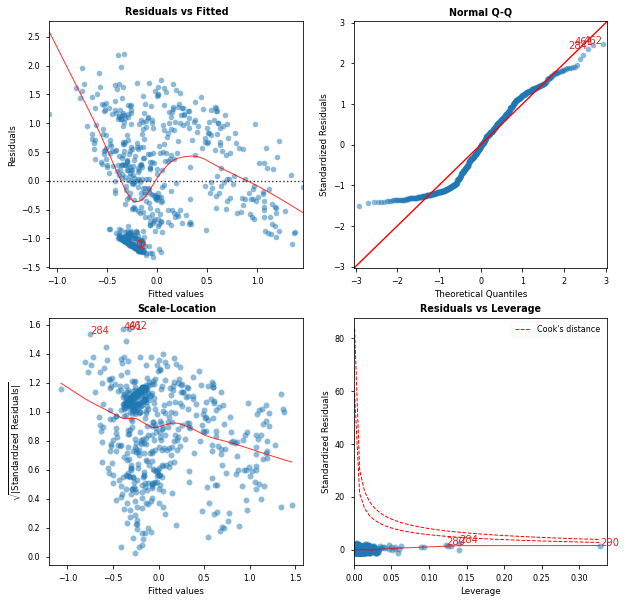

                Features  VIF Factor
0                  const        1.28
3      standardized_txSq        1.66
4       standardized_txs        1.76
5   standardized_trendSq        2.15
1    standardized_trends        2.33
6  standardized_tweetsSq        2.70
2    standardized_tweets        2.87


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [22]:
modelQuadSmoothedNoPost = sm.OLS(YSmooth, XQuadSmoothNoPost).fit()
print(modelQuadSmoothedNoPost.summary())
smoothedQuadDiagnosticsNoPost = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoPost)
smoothedQuadDiagnosticsNoPost()

In [23]:
twtX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_posts", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_postsSq"], 
                                   ["standardized_tweets", "standardized_tweetsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTwt = twtX
XQuadSmoothNoTwt.index = idx

[[-0.0481511   1.33547257 -0.57611267]
 [-0.04062314  0.95053782 -0.78774589]
 [-0.03861568  0.85891432 -0.89356251]
 ...
 [ 0.03867144  0.86139673 -0.3271723 ]
 [ 0.03013975  0.5232409  -0.3909336 ]
 [ 0.05121805  1.51101442 -0.26341101]]
[[-0.0481511   0.06459031 -0.57611267]
 [-0.04062314  0.04943067 -0.78774589]
 [-0.03861568  0.04570492 -0.89356251]
 ...
 [ 0.03867144  0.00369787 -0.3271723 ]
 [ 0.03013975 -0.00137402 -0.3909336 ]
 [ 0.05121805  0.01553374 -0.26341101]]
[[-0.0481511   0.06459031  0.01408547]
 [-0.04062314  0.04943067 -0.00415298]
 [-0.03861568  0.04570492 -0.01142004]
 ...
 [ 0.03867144  0.00369787 -0.03999868]
 [ 0.03013975 -0.00137402 -0.03878152]
 [ 0.05121805  0.01553374 -0.04244052]]
[[-0.0481511   0.06459031  0.01408547]
 [-0.04062314  0.04943067 -0.00415298]
 [-0.03861568  0.04570492 -0.01142004]
 ...
 [ 0.03867144  0.00369787 -0.03999868]
 [ 0.03013975 -0.00137402 -0.03878152]
 [ 0.05121805  0.01553374 -0.04244052]]
[[-0.0481511   1.33547257 -0.99319559]
 

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.102
Model:                                  OLS   Adj. R-squared:                  0.092
Method:                       Least Squares   F-statistic:                     10.77
Date:                      Tue, 17 May 2022   Prob (F-statistic):           2.33e-11
Time:                              15:22:31   Log-Likelihood:                -786.33
No. Observations:                       576   AIC:                             1587.
Df Residuals:                           569   BIC:                             1617.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

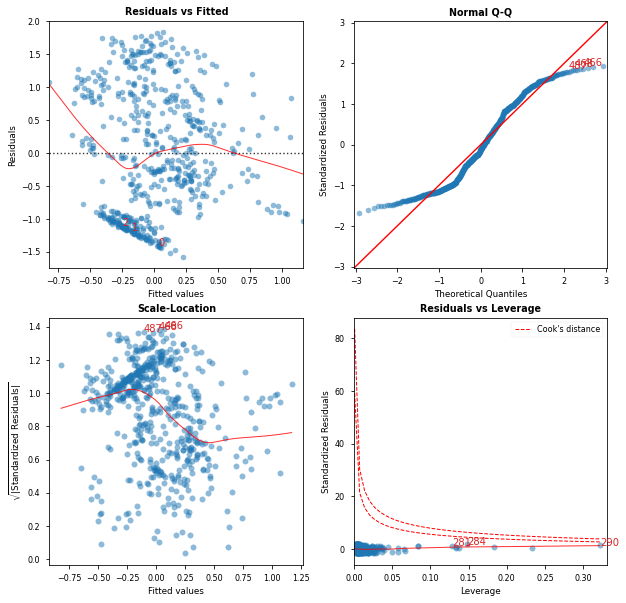

               Features  VIF Factor
0                 const        1.06
3     standardized_txSq        2.17
4      standardized_txs        2.22
6  standardized_postsSq        2.79
2    standardized_posts        2.81
5  standardized_trendSq        3.11
1   standardized_trends        3.18


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [24]:
modelQuadSmoothedNoTwt = sm.OLS(YSmooth, XQuadSmoothNoTwt).fit()
print(modelQuadSmoothedNoTwt.summary())
smoothedQuadDiagnosticsNoTwt = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTwt)
smoothedQuadDiagnosticsNoTwt()

In [25]:
influence = modelQuadSmoothed.get_influence()
inf_sum = influence.summary_frame()
inf_sum
xQuadLowLeverage = XQuadSmooth[np.abs(inf_sum["hat_diag"]) > (20/576)]
xQuadNoOutliers = xQuadLowLeverage[np.abs(inf_sum["student_resid"]) > 2.5]
xQuadRemoveBad = XQuadSmooth.loc[set(XQuadSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
YSmoothRemoveBad = YSmooth.loc[set(YSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
modelQuadSmoothedNoOutliers = sm.OLS(YSmoothRemoveBad, xQuadRemoveBad).fit(cov_type='HC3')
print(modelQuadSmoothedNoOutliers.summary())
noOutliersDiag = Linear_Reg_Diagnostic(modelQuadSmoothedNoOutliers)
noOutliersDiag()

/var/folders/_l/sld8_cln37d1y0mtxmf60gkr0000gn/T/ipykernel_59785/3941719216.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  xQuadNoOutliers = xQuadLowLeverage[np.abs(inf_sum["student_resid"]) > 2.5]
/var/folders/_l/sld8_cln37d1y0mtxmf60gkr0000gn/T/ipykernel_59785/3941719216.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  xQuadRemoveBad = XQuadSmooth.loc[set(XQuadSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
/var/folders/_l/sld8_cln37d1y0mtxmf60gkr0000gn/T/ipykernel_59785/3941719216.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  YSmoothRemoveBad = YSmooth.loc[set(YSmooth.index) - set(xQuadNoOutliers.index)].sort_index()


                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.836
Model:                                  OLS   Adj. R-squared:                  0.834
Method:                       Least Squares   F-statistic:                     511.5
Date:                      Tue, 17 May 2022   Prob (F-statistic):          2.27e-253
Time:                              15:22:34   Log-Likelihood:                -295.92
No. Observations:                       575   AIC:                             609.8
Df Residuals:                           566   BIC:                             649.0
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

NameError: name 'Linear_Reg_Diagnostic' is not defined